# Intro

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
headers = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age','dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'PRICE']

In [77]:
df=pd.read_csv("housing.csv",names=headers,sep='\s+')

In [78]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [80]:
df.shape

(506, 14)

In [81]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
PRICE      0
dtype: int64

# Explore

In [82]:
corr=df.corr()

<Axes: >

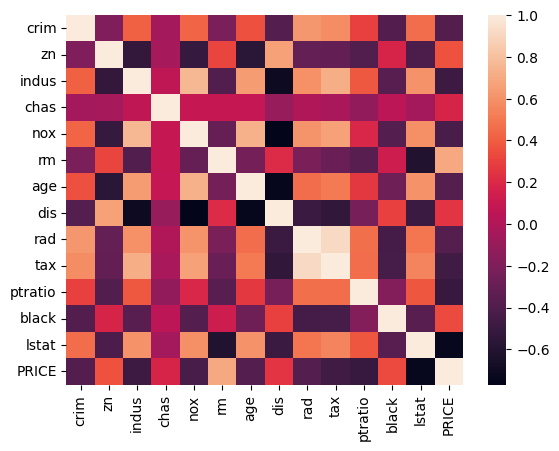

In [83]:
sns.heatmap(corr)

In [84]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
PRICE      229
dtype: int64

<Axes: xlabel='rad', ylabel='count'>

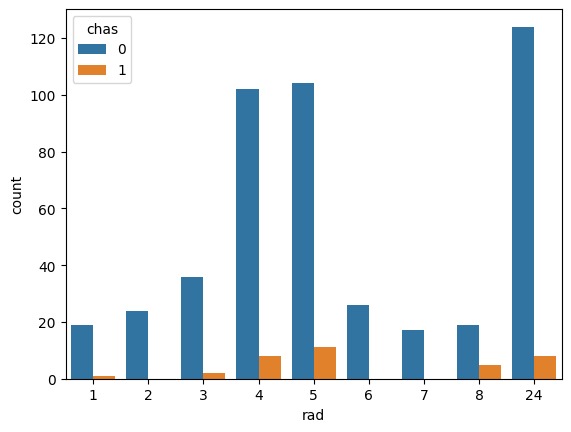

In [85]:
sns.countplot(data=df,x="rad",hue="chas")

In [86]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'PRICE'],
      dtype='object')

# Data Split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [89]:
X=df.drop(["PRICE"],axis=1)
y=df["PRICE"]

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Model Selection

## Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor
d_model=DecisionTreeRegressor()
d_model.fit(X_train,y_train)
pred1=d_model.predict(X_test)

### Scores

In [92]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred1))
print(d_model.score(X_test,y_test))

3.730392156862745
0.5656633806489727


## Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
r_model=RandomForestRegressor(random_state=1)
r_model.fit(X_train,y_train)
pred2=r_model.predict(X_test)

### Scores

In [94]:
print(mean_absolute_error(y_test,pred2))
print(r_model.score(X_test,y_test))

2.66122549019608
0.7610067106259215


## Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
l_model=LinearRegression()
l_model.fit(X_train,y_train)
pred3=l_model.predict(X_test)

### Scores

In [96]:
print(mean_absolute_error(y_test,pred3))
print(l_model.score(X_test,y_test))

3.842909220444503
0.5892223849182503


Here RandomForestRegressor is the best one

# Final

In [97]:
test=pd.read_csv("test.csv")

In [98]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [99]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [100]:
test.shape

(173, 14)

In [101]:
df.shape

(506, 14)

In [102]:
test_dropped=test.drop(['ID'],axis=1)

In [103]:
from sklearn.ensemble import RandomForestRegressor
r_model=RandomForestRegressor(random_state=1)
r_model.fit(X_train,y_train)
pred4=r_model.predict(test_dropped)

In [109]:
final=pd.DataFrame()

In [122]:
pred4=pred4.round(2)

In [123]:
final["ID"]=test["ID"]
final["Prices"]=pred4

In [124]:
final.head()

,ID,Prices
0,3,34.95
1,6,26.79
2,8,23.73
3,9,17.92
4,10,19.67


In [125]:
final.to_csv("Submissions.csv",index=False)